In [1]:
# Experiment is not useful:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle
from kneed import KneeLocator
from sklearn.cluster import KMeans


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
data = pd.read_csv("Real estate.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.shape

(414, 8)

In [174]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [4]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [5]:
data.drop(axis=1, columns=['No', 'X1 transaction date'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lo

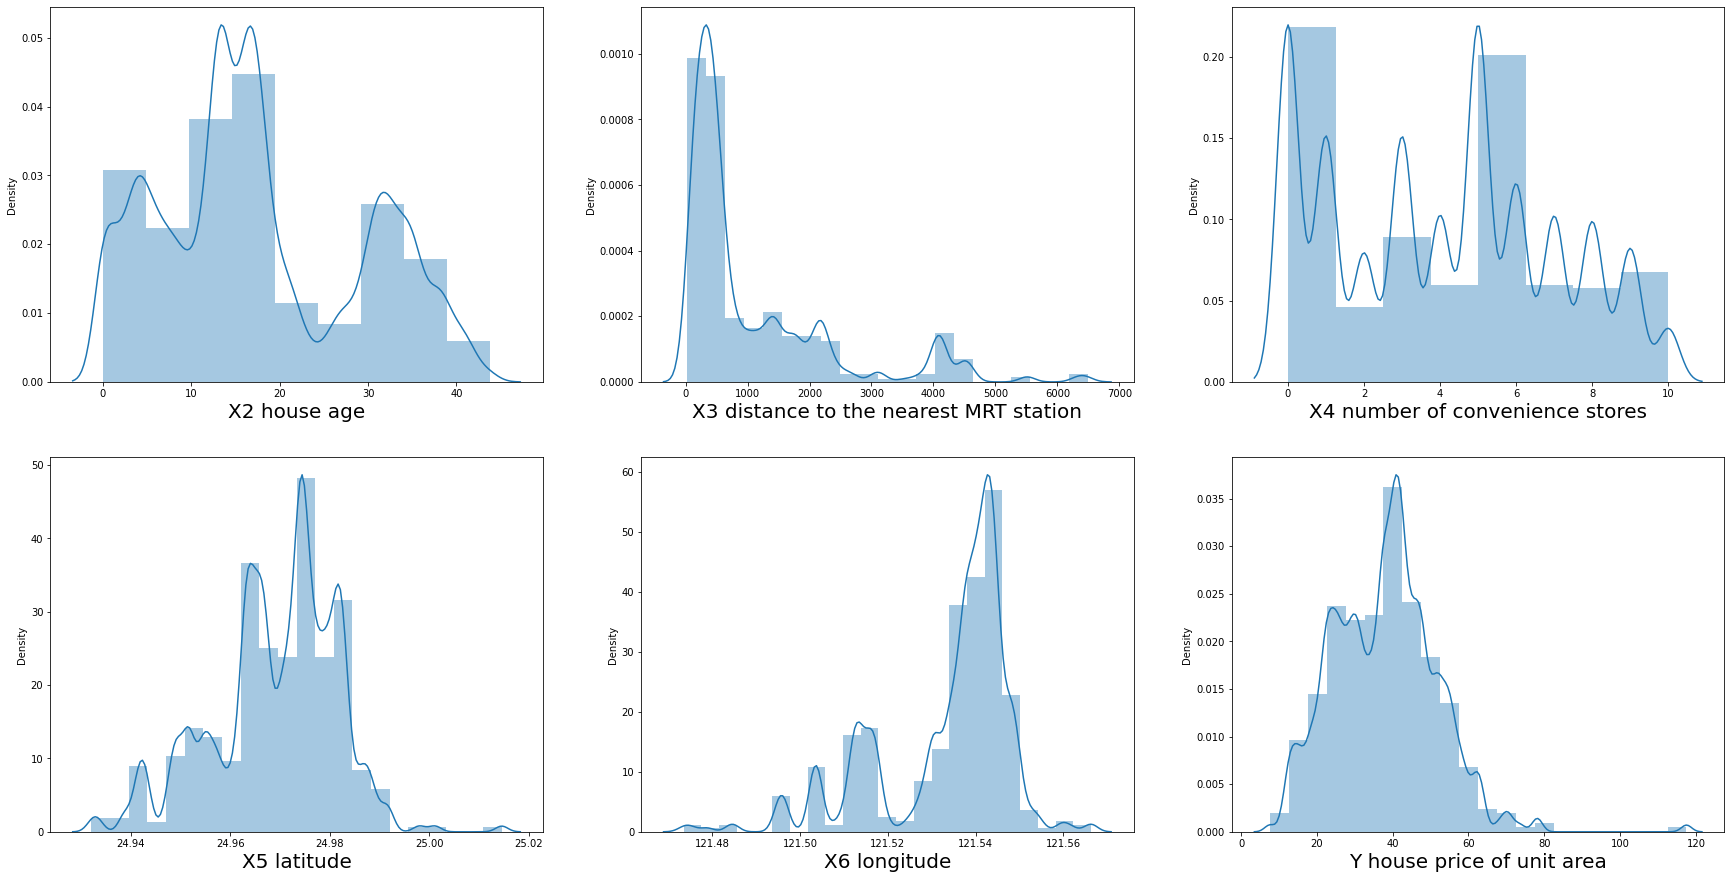

In [6]:
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [7]:
# Checking the Categories:

for col in data.columns:
  print(f"{col} have  {pd.Categorical(data[col])}  unique category \n")

X2 house age have  [32.0, 19.5, 13.3, 13.3, 5.0, ..., 13.7, 5.6, 18.8, 8.1, 6.5]
Length: 414
Categories (236, float64): [0.0, 1.0, 1.1, 1.5, ..., 41.3, 41.4, 42.7, 43.8]  unique category 

X3 distance to the nearest MRT station have  [84.87882, 306.59470, 561.98450, 561.98450, 390.56840, ..., 4082.01500, 90.45606, 390.96960, 104.81010, 90.45606]
Length: 414
Categories (259, float64): [23.38284, 49.66105, 56.47425, 57.58945, ..., 5512.038, 6306.153, 6396.283,
                            6488.021]  unique category 

X4 number of convenience stores have  [10, 9, 5, 5, 5, ..., 0, 9, 7, 5, 9]
Length: 414
Categories (11, int64): [0, 1, 2, 3, ..., 7, 8, 9, 10]  unique category 

X5 latitude have  [24.98298, 24.98034, 24.98746, 24.98746, 24.97937, ..., 24.94155, 24.97433, 24.97923, 24.96674, 24.97433]
Length: 414
Categories (234, float64): [24.93207, 24.93293, 24.93363, 24.93885, ..., 24.99176, 24.99800, 25.00115,
                            25.01459]  unique category 

X6 longitude have  [121

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


In [8]:
X = data.drop('Y house price of unit area', 1)
Y = data['Y house price of unit area']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


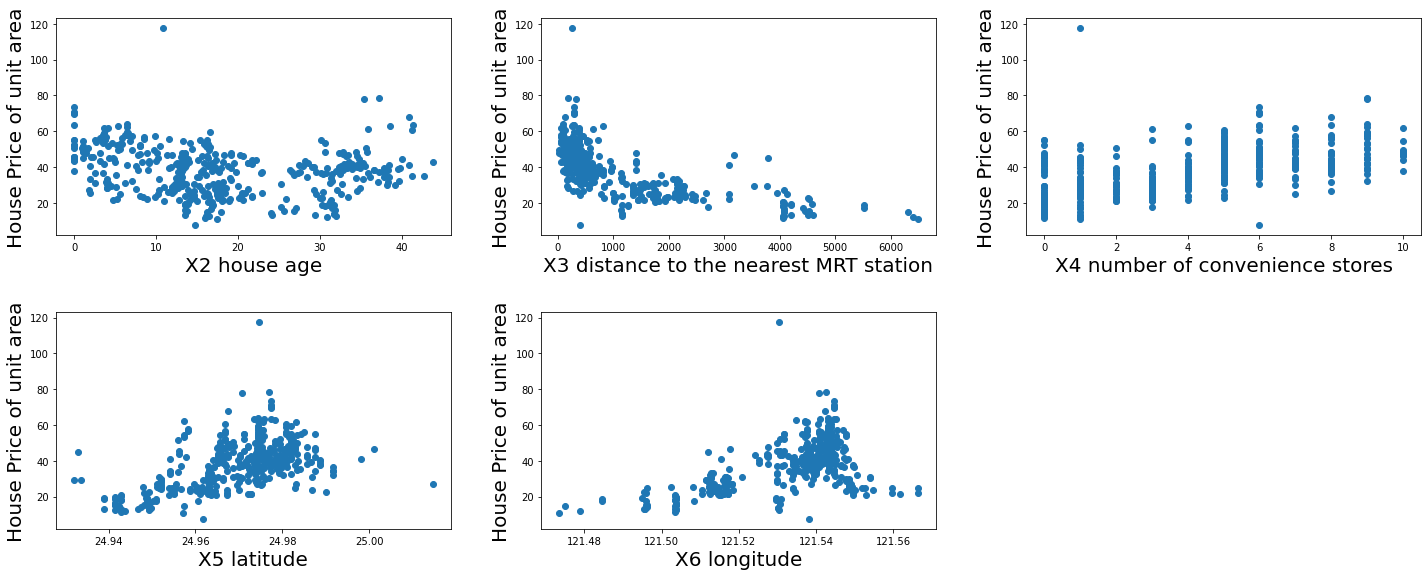

In [9]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column], Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('House Price of unit area',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

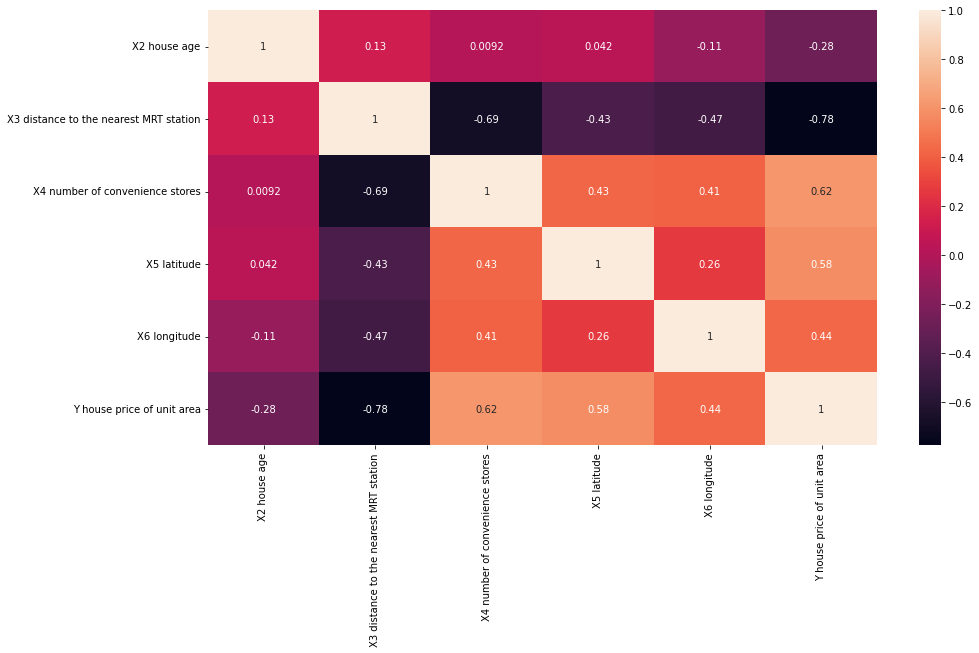

In [10]:
# Check the multicollinearity factor

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

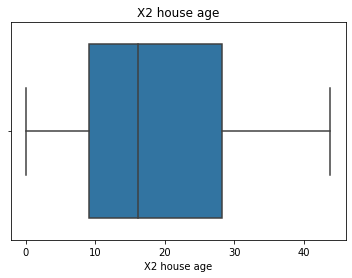

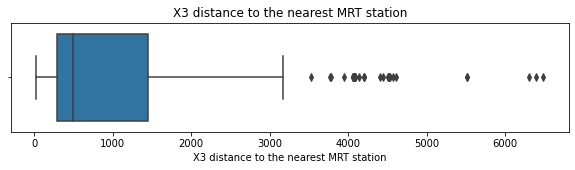

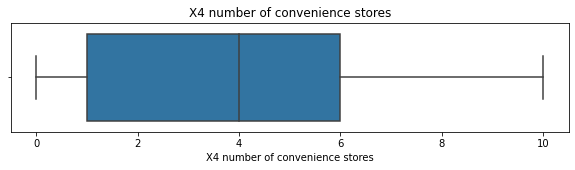

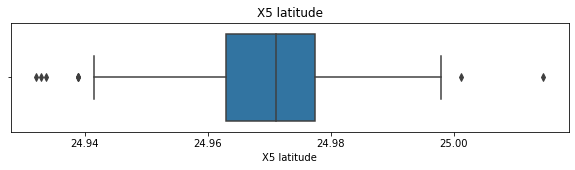

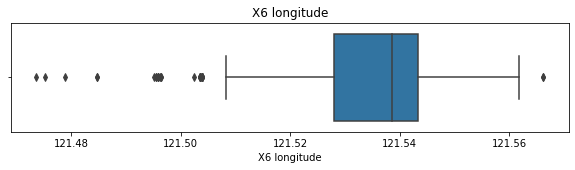

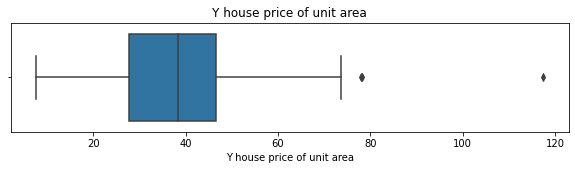

<Figure size 720x144 with 0 Axes>

In [11]:
# find the outliers:

for column in data:
    df = data.copy()
    sns.boxplot(df[column])
    plt.title(column)
    plt.figure(figsize=(10,2))

# **1. Apply Linear Regression Algorithm:**

In [15]:
X = data.drop('Y house price of unit area', 1)
Y = data['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=75)

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)


y_predict_for_test = regression_model.predict(x_test)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


y_predict_for_train = regression_model.predict(x_train)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Train data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.5486298619886856
Accuracy For Train data (R-Square):  0.5950587411141373


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [16]:
# Apply Scaling Techniques:

X = data.drop('Y house price of unit area', 1)
Y = data['Y house price of unit area']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=75)

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train)


y_predict_for_test = regression_model.predict(x_test_scaled)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


y_predict_for_train = regression_model.predict(x_train_scaled)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Train data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.548629861988684
Accuracy For Train data (R-Square):  0.5950587411141455


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


# **2. Apply L1 & L2 Regularization Techniques:**

In [ ]:
# Ridge:

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train_scaled, y_train)


ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train_scaled, y_train)


In [25]:
# Check the R_Square value based on test data:
y_predict_for_test = ridge_model.predict(x_test_scaled)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


# Check the R_Square value based on train data:
y_predict_for_train = ridge_model.predict(x_train_scaled)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Train data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.5486482588166371
Accuracy For Train data (R-Square):  0.595058682837661


In [21]:
# Lasso:

lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train_scaled, y_train)
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train_scaled, y_train)

# Check the R_Square value based on test data:
y_predict_for_test = lasso_reg.predict(x_test_scaled)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


# Check the R_Square value based on train data:
y_predict_for_train = lasso_reg.predict(x_train_scaled)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Train data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.5488246766579767
Accuracy For Train data (R-Square):  0.5950582325461845


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


# **3. try to create Cluster and find out the Score:**

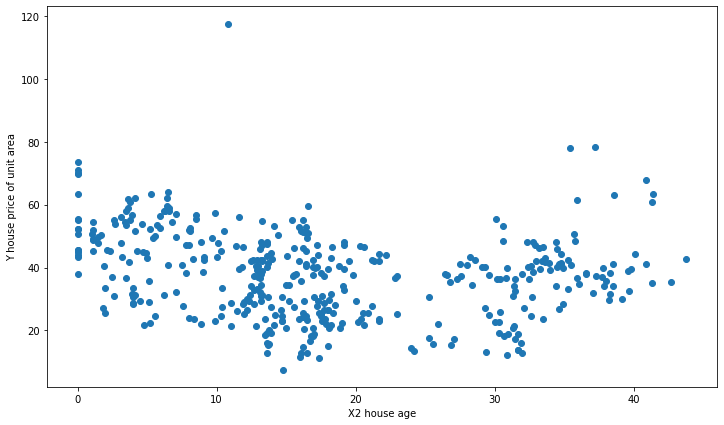

In [26]:
plt.figure(figsize=(12,7))
plt.scatter(data['X2 house age'], data['Y house price of unit area'])
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.show()

In [31]:
# Apply K-Means Clustering:

def Elbow_Method(data):
  wcss = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=75)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
  
  kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
  return kn.knee, wcss


def Ploting_Elbow_graph(x, y):
  plt.figure(figsize=(13,5))
  plt.plot(x, y)
  plt.title('The Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

In [32]:
n_cluster, wcss = Elbow_Method(data)
n_cluster

3

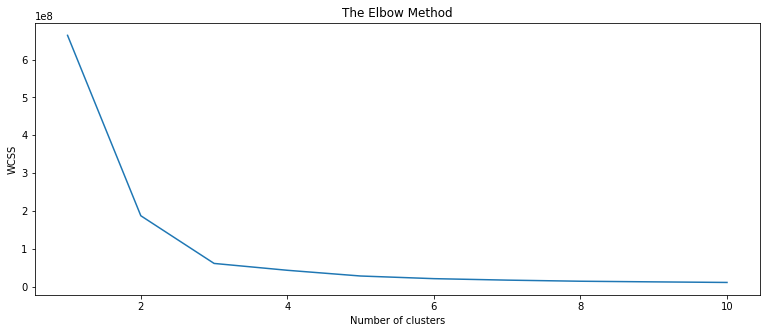

In [33]:
Ploting_Elbow_graph(range(1, 11), wcss)

In [34]:
kmeans = KMeans(n_clusters = n_cluster, init = 'k-means++', random_state = 75)
y_kmeans = kmeans.fit_predict(data)
print(y_kmeans)

[2 2 2 2 2 0 2 2 1 0 2 2 2 0 0 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 1 2 2 2 2 1 0
 0 2 2 1 1 2 2 2 2 2 2 1 1 2 0 0 2 2 0 2 2 1 2 0 2 0 2 2 2 2 2 2 2 2 2 2 1
 2 0 2 0 2 0 2 2 2 0 2 2 0 1 0 1 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 0 2 2 2 1 1 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2
 1 2 2 2 0 2 1 1 0 2 2 2 2 2 1 2 2 0 2 2 2 0 1 2 2 2 2 2 1 2 0 2 1 2 0 1 0
 0 0 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0
 2 0 2 2 1 2 1 0 0 1 1 2 0 2 2 2 2 2 0 2 0 2 0 2 2 2 2 1 2 0 2 0 2 1 2 2 2
 2 0 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0
 0 2 1 2 2 2 0 2 0 2 2 1 2 0 0 2 2 2 2 0 2 2 2 2 1 2 2 2 0 2 2 2 0 1 0 1 2
 2 2 2 0 2 2 2 2 2 2 2 1 2 0 1 2 2 2 0 0 0 0 2 2 2 2 0 2 2 2 2 2 0 0 0 2 0
 2 2 2 2 2 0 0 2 2 2 2 2 1 2 1 2 2 0 0 2 2 0 2 2 1 2 2 0 0 2 2 0 2 2 2 2 2
 0 0 1 2 2 2 2]


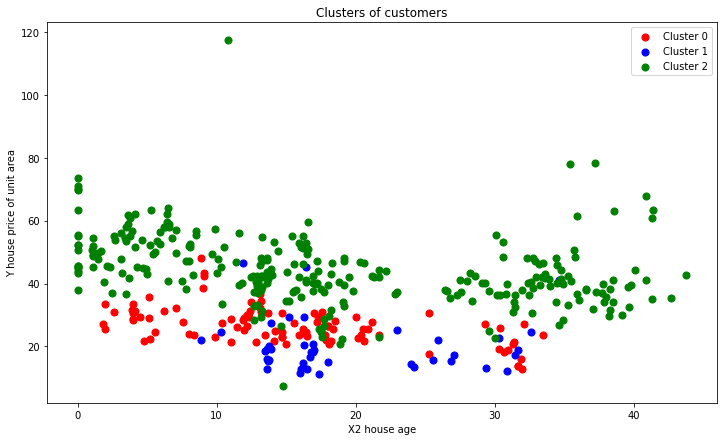

In [35]:
# Visualize the cluster:

plt.figure(figsize=(12,7))
plt.scatter(data[y_kmeans == 0]['X2 house age'], data[y_kmeans == 0]['Y house price of unit area'], s=50, c='red', label='Cluster 0')
plt.scatter(data[y_kmeans == 1]['X2 house age'], data[y_kmeans == 1]['Y house price of unit area'], s=50, c='blue', label ='Cluster 1')
plt.scatter(data[y_kmeans == 2]['X2 house age'], data[y_kmeans == 2]['Y house price of unit area'], s=50, c='green', label ='Cluster 2')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black', label='Centroids')


plt.title('Clusters of customers')
plt.xlabel('X2 house age')
plt.ylabel('Y house price of unit area')
plt.legend()
plt.show()

In [36]:
data['cluster_label'] = y_kmeans
data.head(15)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,cluster_label
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,0
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,2
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,2
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,1
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,0


In [37]:
first_cluster_data = np.where(data['cluster_label'] == 0)
first_cluster_data = data.iloc[first_cluster_data]

second_cluster_data = np.where(data['cluster_label'] == 1)
second_cluster_data = data.iloc[second_cluster_data]

third_cluster_data = np.where(data['cluster_label'] == 2)
third_cluster_data = data.iloc[third_cluster_data]


In [38]:
first_cluster_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,cluster_label
5,6,2012.667,7.1,2175.030,3,24.96305,121.51254,32.1,0
9,10,2013.417,17.9,1783.180,3,24.96731,121.51486,22.1,0
13,14,2012.667,20.4,2469.645,4,24.96108,121.51046,23.8,0
14,15,2013.500,13.2,1164.838,4,24.99156,121.53406,34.3,0
20,21,2013.417,4.5,2275.877,3,24.96314,121.51151,29.3,0


In [39]:
first_cluster_data.shape

(93, 9)

In [40]:
first_cluster_data.drop(axis=1, columns=['cluster_label'], inplace=True)
X = first_cluster_data.drop('Y house price of unit area', 1)
Y = first_cluster_data['Y house price of unit area']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [50]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)
print(x_train_scaled.mean(), x_train_scaled.std())

9.910390826302614e-14 1.0


In [51]:
linear_model_first_cluster = LinearRegression()
linear_model_first_cluster.fit(x_train_scaled, y_train)
linear_model_first_cluster.predict(x_test_scaled)

array([22.01868951, 25.31945512, 23.95887788, 22.73481881, 24.95776561,
       32.46161708, 28.50510771, 38.25688138, 27.48229348, 25.07193429,
       29.16329402, 26.99804584, 30.07380262, 18.26001225, 26.93267343,
       33.05763024, 25.24100145, 17.66316961, 33.07400425])

In [52]:
y_predict_for_test = linear_model_first_cluster.predict(x_test_scaled)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")


y_predict_for_train = linear_model_first_cluster.predict(x_train_scaled)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Train data (R-Square):  {r2_score_train_data}")

Accuracy For Test data (R-Square):  0.38805180922311555
Accuracy For Train data (R-Square):  0.6601039224716385
